## KMeans on SA and word count to create 5 new categories

In [31]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats
import seaborn as sns

In [53]:
df=pd.read_csv('Resources/MultiVariables_30Ktraining.csv')
df.drop(['value_stars','stars', 'review_count'], axis=1, inplace=True)
df.head()

,word_count,norm_score
0,127,7.778175
1,128,1.581139
2,190,6.147009
3,98,0.447214
4,106,4.992302


In [54]:
#Make a copy of DF
df_2=df

In [55]:
#Transform star categories to dummies
# df_2=pd.get_dummies(df_2, columns=['stars'])
# df_2

In [56]:
#Standardize/Normalize data
# columns=['word_count', 'review_count', 'norm_score', 'stars_1', 'stars_2', 'stars_3', 'stars_4', 'stars_5']
columns=['word_count', 'norm_score']
df_2_std= stats.zscore(df_2[columns])

In [57]:
#Cluster the data
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_2_std)
labels = kmeans.labels_

In [58]:
#Add clusters back to original df
df_2['clusters'] = labels
columns.extend(['clusters'])

In [59]:
#Analyze clusters
df_2[columns].groupby(['clusters']).mean()

,word_count,norm_score
clusters,,
0,88.690240,0.134888
1,182.630224,7.422315
2,76.599097,4.559576
3,494.959153,7.151962
4,248.716585,3.027190


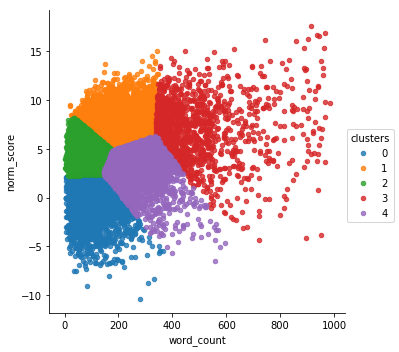

In [67]:
#2D scatterplots
sns.lmplot('word_count', 'norm_score',
           data=df_2,
           fit_reg=False,
           hue='clusters',
            scatter_kws = {"marker": "D",
                          "s": 20})
plt.xlabel('word_count')
plt.ylabel('norm_score')
plt.savefig('KMeans_2.png', dpi = 300)